<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (Bank_Personal_Loan_Modelling.csv) and read it into DataFrame:

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Performing Basic EDA

Find the shape of the data,data type of individual columns

Check the presence of missing values

Descriptive stats of numerical columns

Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

Distribution of categorical columns


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [3]:
data.shape

(5000, 14)

<h3><b>We see that there are 5000 rows and 14 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [4]:
data.info() #Shows datatypes of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values


In [5]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h3><b>We see that there are no missing or null values in data.</b> </h3>

<h3><b>Now let's drop unessential columns and analyse the data by its summary.</b><h3>

In [7]:
# The first column is ID column which has nothing to do with the model attriibutes. 
#Also, ZIP Code is of not much relevance, so we drop both ID and ZIP Code.

data = data.drop(labels = "ID", axis = 1)
data = data.drop(labels = "ZIP Code", axis = 1)

In [8]:
data.describe() #Shows brief summary of data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data[data["Experience"] < 0].count()

Age                   52
Experience            52
Income                52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

<h3><b>Since, we see something abnormal here i.e min value of Experience column(#years of professional experience) is -3. This does not seems relevant to our context, so we need to handle this as Experience can only have whole numbers (0,1,2,3,...)

<br>

One way of doing so is by replacing negative values by mean, median. But doing so will not be a good idea considering the large spread/distribution of the data. So we replace negative values in Experience columns to 0 to have minimal impact or repercussions on other metrics.

</b></h3>

In [10]:
data.loc[(data["Experience"] < 0),'Experience']= 0

Now, we will see Summarised Data :

In [11]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<h3><b>
We see that majority of customers are ranging from age approximately between 33 to 56.<br />
    
The distribution of the income seems to highly skewed and also that of the mortgage.

Most of families are smaller in size and contains mostly 2 to 4 members. 


Half of the customers are atleast Graduate.

9.6% have personal loan, while 10.4% have Securites Account, 6% have CD Account and 29% have Credit Cards.

Large group of people, about 59.68% use Online banking.
</h3></b>

<h3><b>Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. This will visually display the spread and distribution of data, also highlighting the outliers. </b></h3>

<h3><b>This visual representation will not only take into account the five point summary while displaying , but also give a clearer repesentation of spread and also detect outliers</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Distribution of Attributes :

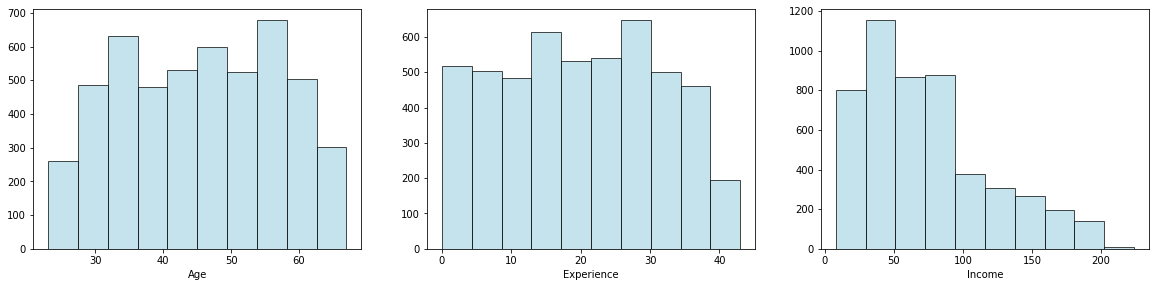

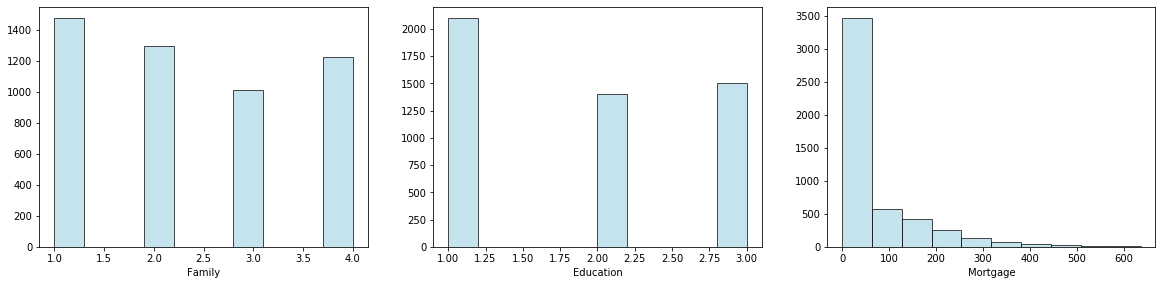

In [12]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.Age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(data.Experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(3,3,3)
plt.hist(data.Income, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.Family, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Family')

plt.subplot(3,3,2)
plt.hist(data.Education, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')


plt.subplot(3,3,3)
plt.hist(data.Mortgage, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')


plt.show()

Text(0.5, 0, 'CCAvg')

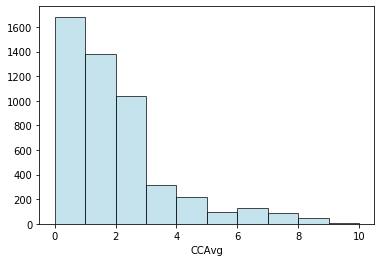

In [13]:
plt.hist(data.CCAvg, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')


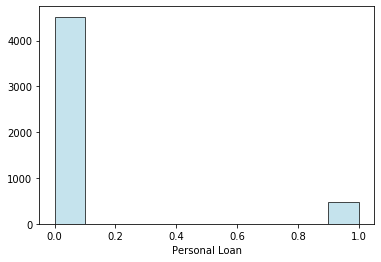

In [14]:
plt.hist(data["Personal Loan"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Personal Loan')

plt.show()

<h3><b>We can see that Age, Experience have normal distribution, while Income, Mortgage, CCAvg are highly skewed.</h3></b>

<h3><b>The spread of Income and Mortgage is large and also shows high degree of skewness. </h3></b>

<h3><b>Let's understand it more visually by visualizing its outliers and skewness values. </h3></b>

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.


If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.


In [15]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.Age),stats.skew(data.Experience),stats.skew(data.Education), stats.skew(data.Family),stats.skew(data.Income),stats.skew(data.Mortgage), stats.skew(data.CCAvg)]},
                        index=['Age','Experience','Education', 'Family','Income','Mortgage', 'CCAvg'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Age,-0.029332
Experience,-0.017216
Education,0.227025
Family,0.155174
Income,0.841086
Mortgage,2.103371
CCAvg,1.597964


<h3><b>We see that Income, Mortgage, CCAvg are highly skewed, let's see boxplot to visualize outliers as well.</b></h3>

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


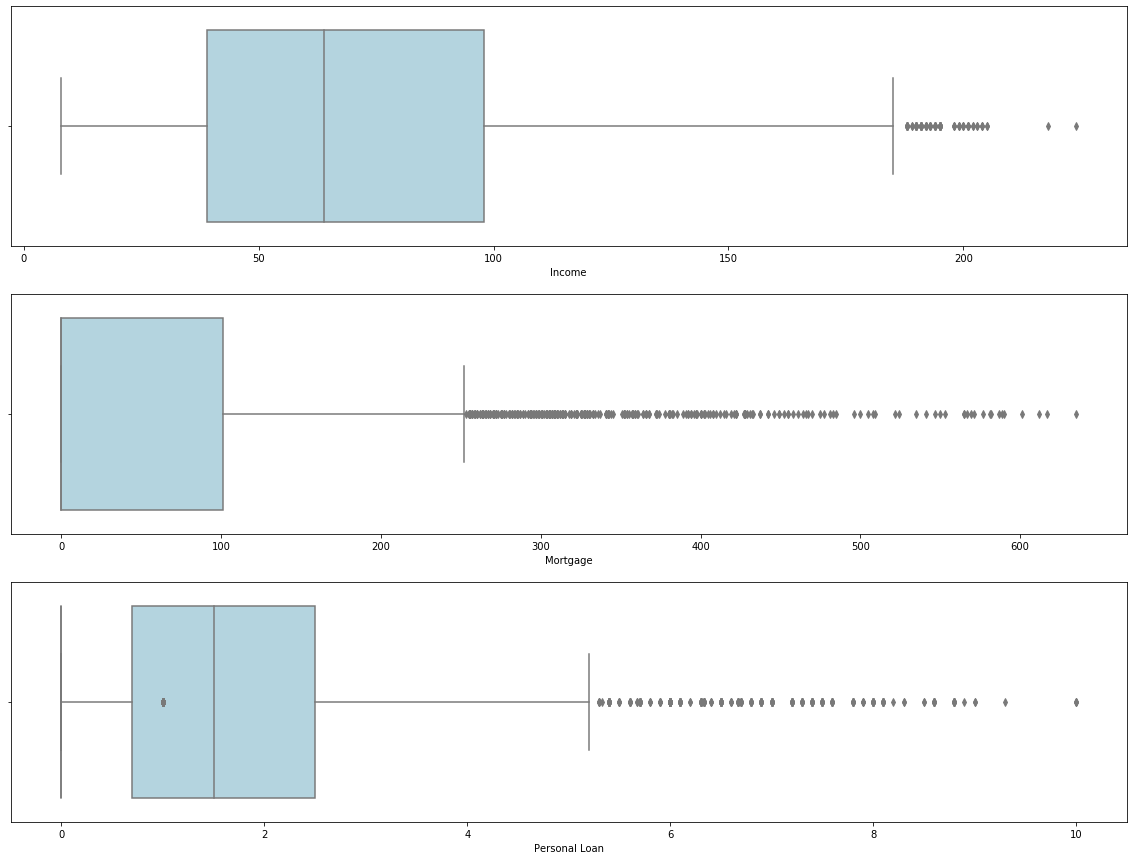

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.Income, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= data.Mortgage, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data.CCAvg, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data["Personal Loan"], color='lightblue')

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Identify Correlation in the Data:

<h3><b>Its very essential to understand the correlation in the data attributes, since they largely influence the outcome of the model. Also, multicollinearity in the model can lead to sub optimal models. </b> </h3>

In [17]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<h3><b>After seeing above correlation matrix, let's also visualize it.</h3></b>

In [18]:
def plot_corr(data, size=18):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

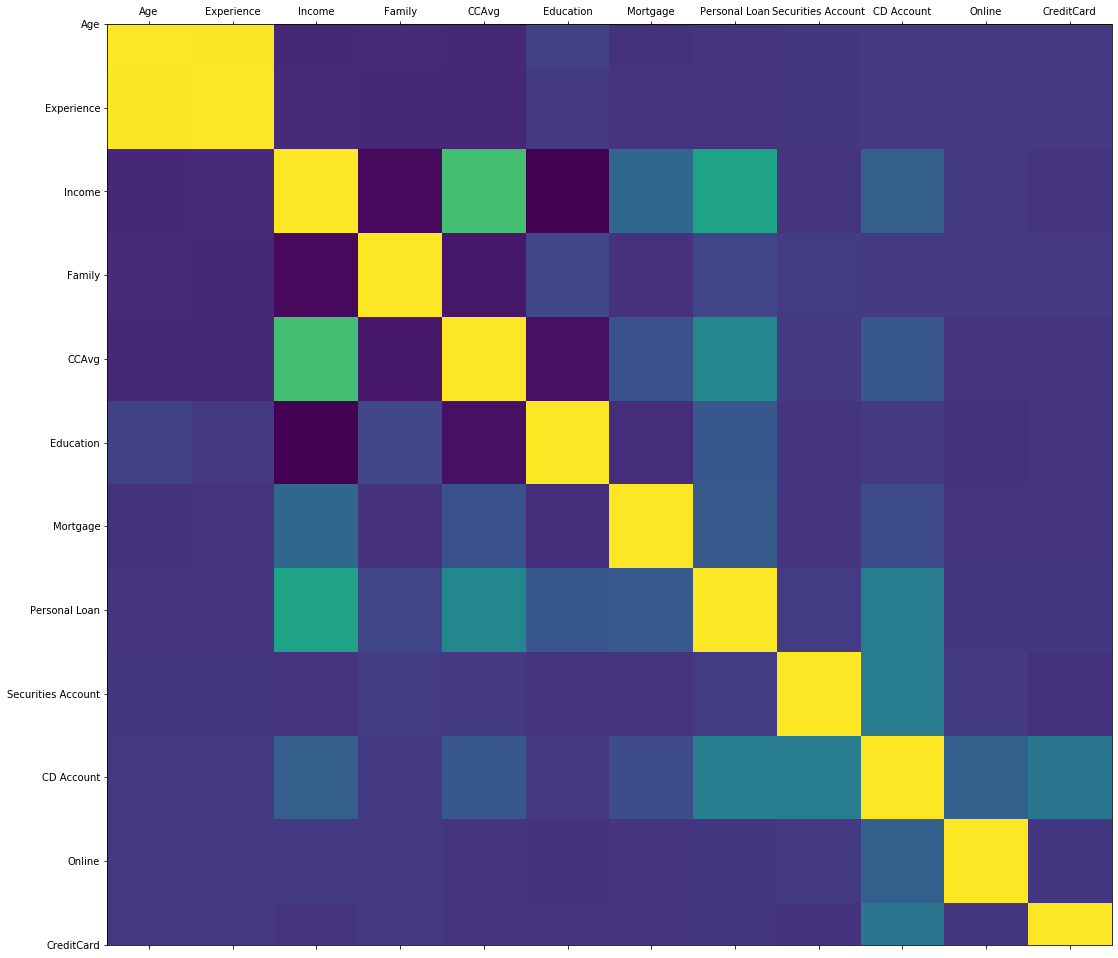

In [19]:
plot_corr(data)

<h3><b><font color="blue"><u>Notable Inferences : </u></font> <br><br> In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.</h3></b>
<h3><b>From the correlation matrix and also from above plot, we see that <i>Age</i> and <i>Experience</i> are highly correlated (Pearson Co-eff 0.99). So we need to consider this owing to multicollinearity which influences the outcome of the model.</b></h3>

<h3><b> We also see that Income and CCAvg are positively correlated, meaning more the income, more the amount spend on credit card. <br>
    

Also, w.r.t our target variable i.e Personal Loan, we see notable correlations (ones below -0.5 and ones above +0.5) as : 

Income and Personal Loan have positive correlation. <br>

The below catplot also shows that customers who have taken personal loan have income higher than some threshold, also can be inferred as customers having very low income have not responded postively for taking personal loan.

</b></h3>

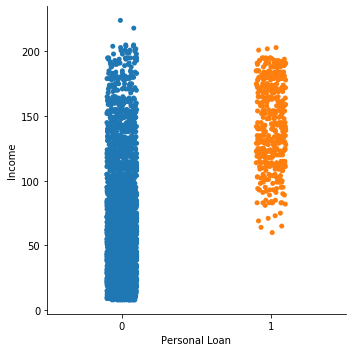

In [20]:
sns.catplot(x="Personal Loan", y="Income", order=[0, 1], data=data);

# Bivarite Distribution of the attibutes :

A bivariate analysis among the different variables can be done using scatter matrix plot.

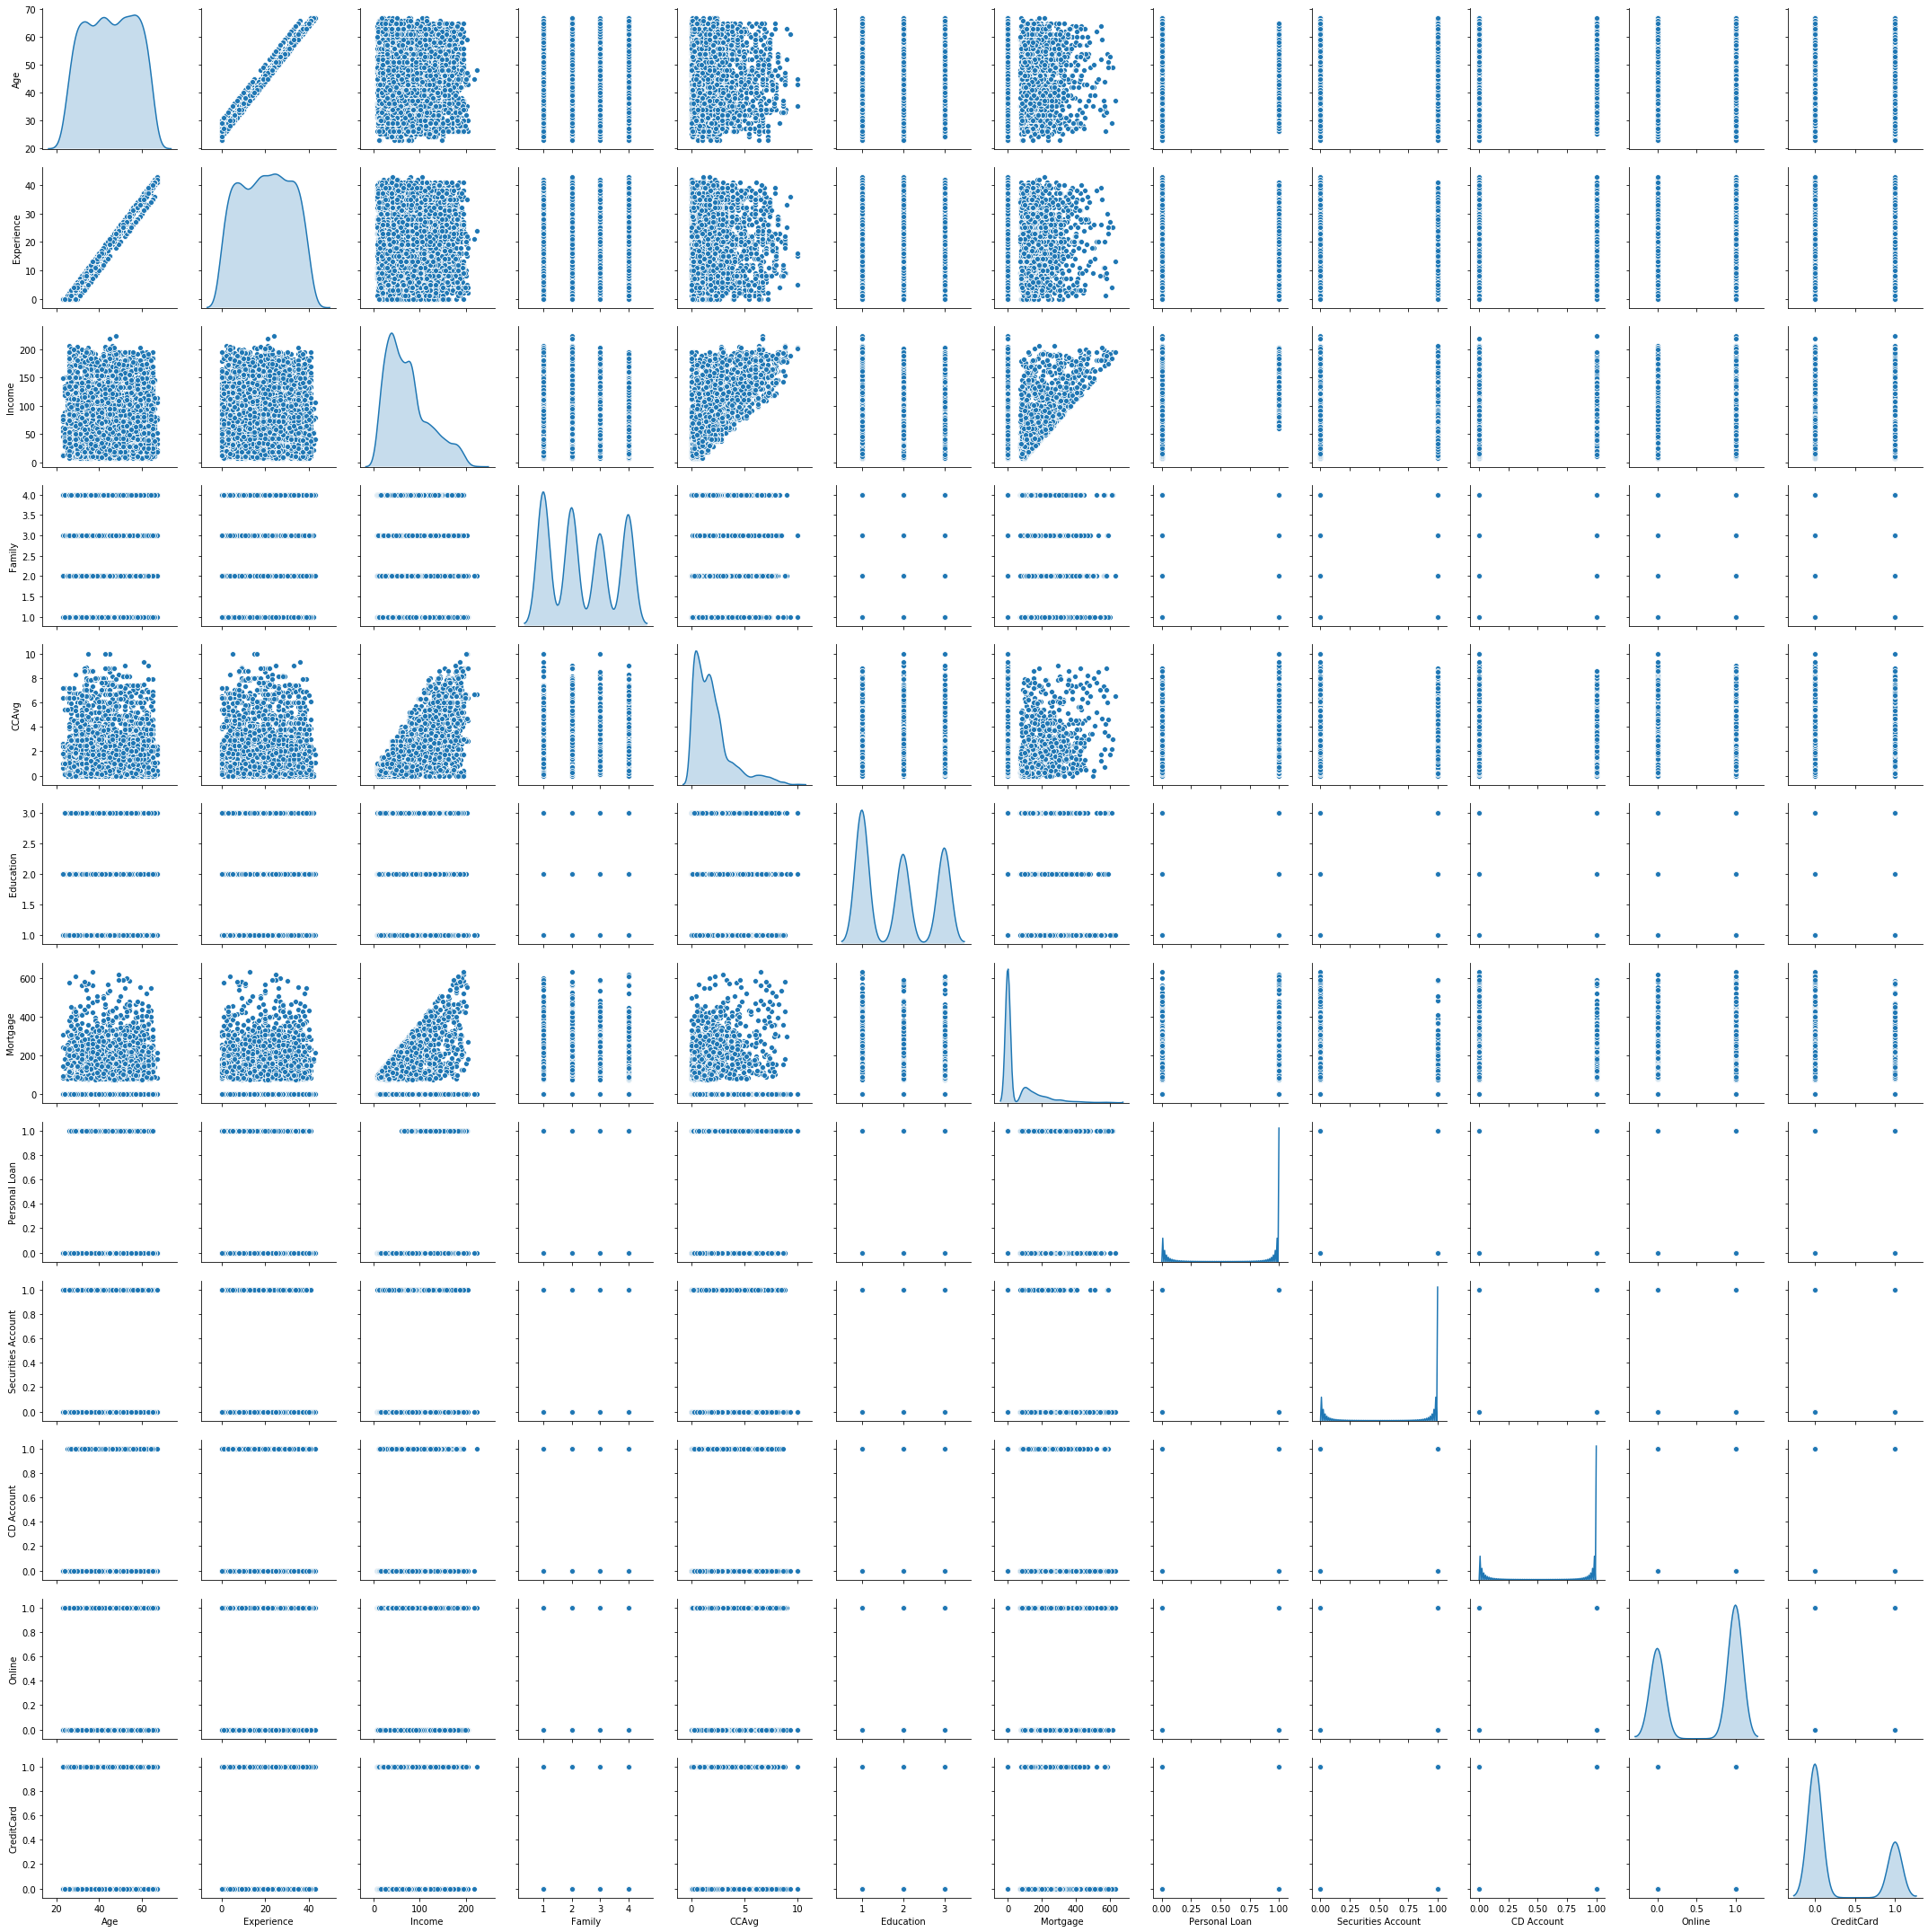

In [21]:
sns.pairplot(data, diag_kind='kde')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Splitting the data into training and test datasets in the ratio of 70:30 respectively :

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Personal Loan',axis=1) 
Y = data['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Analysis using Logistic Regression Classification Model :

In [23]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.399775  0.399195  0.048907  0.644517  0.162338  1.640043  0.000788   

          7         8         9        10  intercept  
0 -0.860417  3.212778 -0.571596 -0.989488  -2.489052  


In [24]:
model_score_train = model.score(x_train, y_train)
print(model_score_train)

model_score_test = model.score(x_test, y_test)
print(model_score_test)

0.9517142857142857
0.946


<h3><b>
Model Accuracy on Training Data = 0.95 <br>
Model Accuracy on Test Data = 0.94
</b></h3>


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8.1 Confusion Matrix for Logistic Regression Classification Model :

Confusion Matrix : 


Text(0.5, 24.0, 'Actual label')

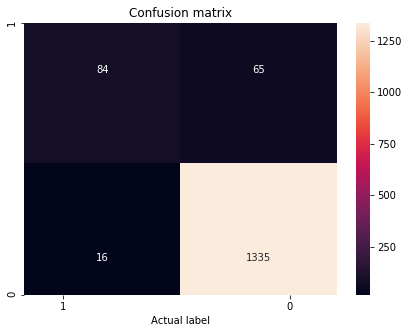

In [25]:
print("Confusion Matrix : ")

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Buy Loan","Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')
plt.xlabel('Actual label')

<font color="green"><u>Inferences :</u></font> 

True Positives (TP): we correctly predicted that customers who will buy personal loan : 84

True Negatives (TN): we correctly predicted that customers who will not buy personal loan : 1335

False Positives (FP): we incorrectly predicted that customers who will buy personal loan ("Type I error") : 65

False Negatives (FN): we incorrectly predicted that that customers who will not buy personal loan ("Type II error") : 16

In [26]:
print("Original Customers who Buy Personal Loan                  : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Customers who did not Buy Personal Loan          : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Data Customers who Buy Personal Loan             : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Data Customers who did not Buy Personal Loan     : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Data Customers who Buy Personal Loan                 : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Data Customers who did not Buy Personal Loan         : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Customers who Buy Personal Loan                  : 480 (9.60%)
Original Customers who did not Buy Personal Loan          : 4520 (90.40%)

Training Data Customers who Buy Personal Loan             : 331 (9.46%)
Training Data Customers who did not Buy Personal Loan     : 3169 (90.54%)

Test Data Customers who Buy Personal Loan                 : 149 (9.93%)
Test Data Customers who did not Buy Personal Loan         : 1351 (90.07%)



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> From the above observations we see that sampling data is stratified and split has uniformly distributed data, and also from confusion matrix, we can clearly see that our Logistic Regression model is performing well both on train and test data with reasonably high accuracy (0.94).

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9 Analysis using KNN :

In [27]:
X = data.drop(labels= "Personal Loan" , axis = 1)
y = data["Personal Loan"]
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [28]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<h3><b>Build and evaluate K-NN Model : </b></h3>

In [29]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 3 is : ",accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 5 is : ",accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 9 is : ",accuracy_score(y_test, y_pred))

Accuracy score with k = 3 is :  0.906
Accuracy score with k = 5 is :  0.9073333333333333
Accuracy score with k = 9 is :  0.91


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9.1 Confusion Matrix for K-NN :

Confusion Matrix


Text(0.5, 1, 'Confusion matrix')

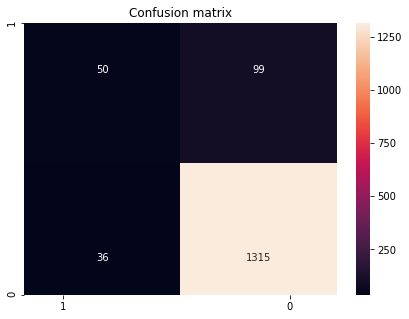

In [30]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Buy Loan","Not Buy"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<h3><b>Cross-validation of K-NN Model : </b></h3> <br>

Running the KNN with no of neighbours to be 1,3,5..19 and finding the optimal number of neighbours from the Misclassification error.

The optimal number of neighbors is 9 since we have min MSE at this point.


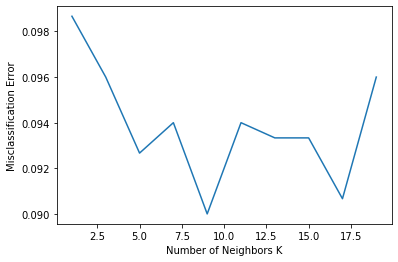

In [31]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d since we have min MSE at this point." % optimal_k)


plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Analysis using Naive-Bayes :

In [32]:
X = data.drop(labels= "Personal Loan" , axis = 1)
y = data["Personal Loan"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


<h3><b>Train Naive-Bayes model : </b></h3>

In [33]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
loan_model = GaussianNB()

loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

<h3><b>Performance of our model with training data : </b></h3>

In [34]:
loan_train_predict = loan_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy on training data : {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy on training data : 0.8900



<h3><b>Performance of our model with test data : </b></h3>

In [35]:
loan_test_predict = loan_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy on test data : {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy on test data : 0.8747



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9.1 Confusion Matrix for Naive-Bayes :

Confusion Matrix


Text(0.5, 1, 'Confusion matrix')

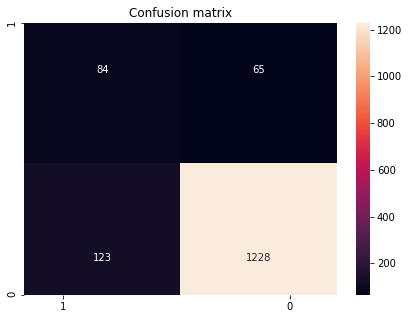

In [36]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

In [37]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Conclusion : <br>




After training and evaluating all three models, we see that <b>Logistic Regression Model(0.94)</b> has <b>highest model accuracy</b>, followed by <b>KNN(0.91 for k=9)</b> and <b>Naive Bayes (0.87)</b>.

Since, a lot of attributes are involved in training data, we also need to consider their co-efficients/weights and what impact they individually also impose on the outcome of the model to verify that model is <b>not biased.</b> <br>

We need to also ensure that the model outcome is not only driven by single attribute while other attributes don't having any impact, also we need to study correlation between attributes to analyse repercussions on the model due to multicollinearity. Also, regularisation of model is essential along with studying the error function of the model.

We will also consider the <b>ROC curve</b> is our case below since we have binary classification. ROC curves are typically used in binary classification to study the output of a classifier. <br>

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Area under curve for model Logistic Regression = 0.775958
Area under curve for model KNN = 0.667909
Area under curve for model Naive Bayes = 0.736357


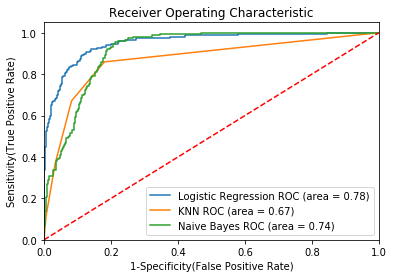

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Also, if we examine confusion matrix of all the models, we can infer that Type I and Type II errors are least made in the Logistic Regression Model as compared to KNN and Naive Bayes models. <br><br>

Owing to all above factors, we can clearly see that from ROC Curve, Type I, Type II errors and also from Model Accuracy that <b>Logistic Regression Classification Model</b> performs the best amongst the other, making it a more sound choice in model selection.